## FireProtDB - ddG Target Class (Multiclass classification) - SVM RBF ##

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score


print('Setup Complete')

Setup Complete


In [8]:
ddG_df = pd.read_csv('Apr10FireProtDB_FeatGen_targetclass.csv')
ddG_df = ddG_df.dropna()
ddG_df = ddG_df.drop(['protein_name',
                      'uniprot_id',
                      'ddG',
                      'secondary_structure',
                      'sequence',
                      'MEC',
                      'Aliphatic Index'], axis=1)

y = ddG_df['target_class']
X = ddG_df.drop(['target_class'], axis=1)

## Radial basis function (rbf) ##

**Test size 20%**

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Default parameters**

In [28]:
rbf_default = SVC(kernel= 'rbf', C=1)
rbf_default.fit(X_train, y_train)

y_train_default_pred = rbf_default.predict(X_train)
default_train_accuracy = accuracy_score(y_train, y_train_default_pred)
print(f"Accuracy on train set: {default_train_accuracy:.04f}")

y_pred = rbf_default.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.04f}")

Accuracy on train set: 0.5993
Accuracy on test set: 0.6432


**Tuning parameters**

In [21]:
%%time
param_grid = {'C': [2, 0.05, 0.1, 0.5, 1, 5, 10, 100]}
svm_model = SVC(kernel = 'rbf')

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print accuracy for each C
for mean_score, C_value in zip(grid_search.cv_results_['mean_test_score'], param_grid['C']):
    print(f"For C = {C_value}, the cross-validated accuracy is {mean_score:.4f}")

best_C = grid_search.best_params_['C']
print(f"Best C value: {best_C}")

best_SVM = SVC(kernel= 'rbf', C=best_C)
best_SVM.fit(X_train, y_train)

y_train_pred = best_SVM.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Accuracy on train set: {train_accuracy:.04f}")

y_pred = best_SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set: {accuracy:.04f}")

For C = 2, the cross-validated accuracy is 0.5993
For C = 0.05, the cross-validated accuracy is 0.5993
For C = 0.1, the cross-validated accuracy is 0.5993
For C = 0.5, the cross-validated accuracy is 0.5993
For C = 1, the cross-validated accuracy is 0.5993
For C = 5, the cross-validated accuracy is 0.5993
For C = 10, the cross-validated accuracy is 0.6020
For C = 100, the cross-validated accuracy is 0.6292
Best C value: 100
Accuracy on train set: 0.6415
Accuracy on test set: 0.6845
CPU times: total: 27.5 s
Wall time: 28 s


**Test size 30%, C=1** (C=1 because that is default param.)

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
best_SVM = SVC(kernel= 'rbf', C=1)
best_SVM.fit(X_train, y_train)

#Train accuracy
y_train_pred = best_SVM.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on train set: {train_accuracy:.4f}")

#Test accuracy
y_pred = best_SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

Accuracy on train set: 0.6030
Accuracy on test set: 0.6200


## Evaluation - rbf ##

In [31]:
#For 20% test size
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred))

Final classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.64      1.00      0.78       420
           2       0.00      0.00      0.00        17

    accuracy                           0.64       653
   macro avg       0.21      0.33      0.26       653
weighted avg       0.41      0.64      0.50       653



In [29]:
#For 20% test size BEST PARAMETERS
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred))

Final classification report:
              precision    recall  f1-score   support

           0       0.77      0.12      0.22       216
           1       0.68      0.99      0.80       420
           2       0.83      0.29      0.43        17

    accuracy                           0.68       653
   macro avg       0.76      0.47      0.48       653
weighted avg       0.71      0.68      0.60       653



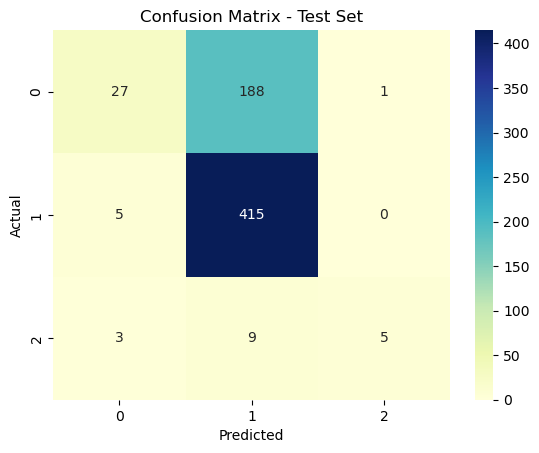

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()